Use Newton's method to find the roots of $f(x)=x^3+2x+1$.

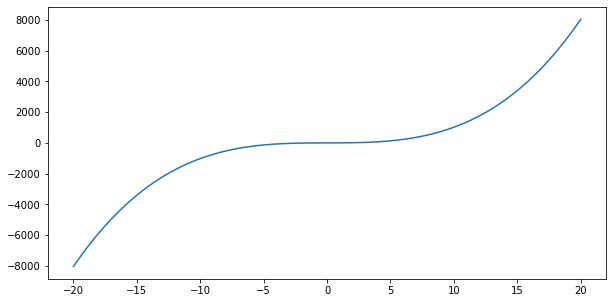

In [6]:
import matplotlib.pyplot as plt 
import numpy as np 
  
x = np.linspace(-20, 20, 100) 
f = x**3 + 2*x + 1
  
fig = plt.figure(figsize = (10, 5)) 
# Create the plot 
plt.plot(x, f) 
  
# Show the plot 
plt.show() 

In [2]:
def newton(f,Df,x0,epsilon,max_iter):
    '''
        Implement Newton's method: compute the linear approximation
        of f(x) at xn and find x intercept by the formula
            x = xn - f(xn)/Df(xn)
        Continue until abs(f(xn)) < epsilon and return xn.
        If Df(xn) == 0, return None.
        If the number of iterations
        exceeds max_iter, then return None.

       '''
    xn = x0
    for n in range(max_iter):
        fxn = f(xn)
        if abs(fxn) < epsilon:
            print('Found solution after',n,'iterations.')
            return xn # exit the loop
        Dfxn = Df(xn)        
        if Dfxn == 0:
            print('Zero derivative. No solution found.')
            return None # exit the loop
        xn = xn - fxn/Dfxn
    print('Exceeded maximum iterations. No solution found.') 
    # This line will not be executed unless neither of the criteria is met in max_iter steps                                   
    return None

In [48]:
f = lambda x: x**3 + 2*x + 1  
Df = lambda x: 3*x**2 + 2
newton(f,Df,5,1e-8,100)

Found solution after 8 iterations.


-0.45339765151640393

### Newton's method diverges in certain cases. 
For example, $f(x)=x^{1/3}$.

In [11]:
f = lambda x: x**(1/3)
Df = lambda x: (1/3)*x**(-2/3)
approx = newton(f,Df,0.1,1e-2,100)

Exceeded maximum iterations. No solution found.


Let $f(x)=x^3-2x+2$ and take 0 as the starting point. 

In [57]:
f = lambda x: x**3 - 2*x + 2
Df= lambda x: 3*x**2 - 2
newton(f,Df,0,1e-2,100)

Exceeded maximum iterations. No solution found.


### Newton's method in multivariables


In [37]:
def Newton_system(F, J, x0, eps, max_iter):
    """
    Solve nonlinear system F=0 by Newton's method.
    J is the Jacobian of F. Both F and J must be functions of x.
    At input, x holds the start value. The iteration continues
    until ||F|| < eps or exceeds max_iter.
    """
    xn=x0
    for n in range(max_iter):
        Fxn = F(xn)
        if np.linalg.norm(Fxn, ord=2) < eps: # l2 norm of the vector F(xn)
            print('Found solution after',n,'iterations.')
            return xn # exit the loop
        JFxn = J(xn)
        if np.linalg.det(JFxn) == 0: # JFxn is not invertible
            print('Zero Jacobian. No solution found.')
            return None # exit the loop
        delta = np.linalg.solve(JFxn, Fxn)
        xn = xn - delta
    print('Exceeded maximum iterations. No solution found.') 
    # This line will not be executed unless neither of the criteria is met in max_iter steps                                   
    return None

    

Minimize $f(x,y)=2x^2-(x-1)(y-2)^2+2y^4$.

In [63]:
def F(x): #x= (x,y)
        return np.array(
            [4*x[0] - (x[1]-2)**2,
             -2*(x[0]-1)*(x[1]-2) + 8*x[1]**3]) #x[0]=x, x[1]=y
def J(x):
        return np.array(
            [[4, -2*(x[1]-2)],
             [-2*(x[1]-2), -2*(x[0]-1)+24*x[1]**2]])

x0=np.array([0,0])    # (x,y)=(0,0)
    
Newton_system(F,J,x0,0.0001,1000)    

Found solution after 1 iterations.


array([1., 0.])


Sometimes it is helpful to draw the graph of $f(x,y)=2x^2-(x-1)(y-2)^2+2y^4$ in 3D.

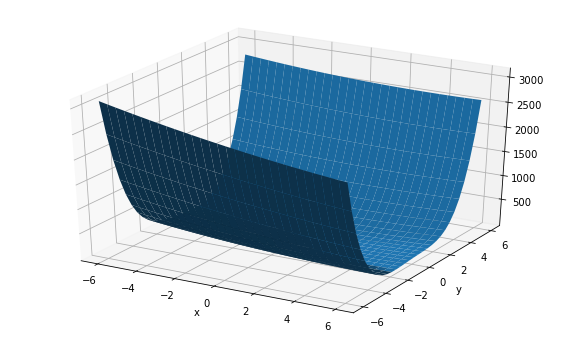

In [49]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (10, 6))
ax = plt.axes(projection="3d")
def f(x, y):
    return 2*x**2 - (x-1)*(y-2)**2+2*y**4
x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)
ax.plot_surface(X, Y, Z,)
                
plt.xlabel('x')
plt.ylabel('y')

plt.show()
